# pMHC movement based on peptide anchoring

## Introduction

In this notebook, *apo*-*holo* comparisons between different anchoring patterns of MHC alleles plotted next to each other. The anchoring patterns were determined by finding the peptide motifs of each MHC allele from the [MHCMotifAtlas](http://mhcmotifatlas.org/home) and using these strong motifs as anchors for the peptide.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from python_pdb.formats.residue import THREE_TO_ONE_CODE

In [ ]:
mhc_anchor_position_df = pd.read_csv('../data/external/mhc_motif_atlas.csv')
mhc_anchor_position_df = mhc_anchor_position_df.query("grade in ('high', 'dominant')")
mhc_anchor_position_df = mhc_anchor_position_df.sort_values('allele_slug')
mhc_anchor_position_df = mhc_anchor_position_df[['allele_slug', 'position', 'amino_acid', 'peptide_length']]
mhc_anchor_position_df = mhc_anchor_position_df.reset_index(drop=True)

mhc_anchor_position_df

allele_slug  position amino_acid  peptide_length
0    hla_a_01_01         2          T               9
1    hla_a_01_01         3          D               9
2    hla_a_01_01         9          Y               9
3    hla_a_02_01         2          L               9
4    hla_a_02_01         9          L               9
..           ...       ...        ...             ...
319  hla_g_01_03         1          K               9
320  hla_g_01_04         1          R               9
321  hla_g_01_04         3          P               9
322  hla_g_01_04         1          K               9
323  hla_g_01_04         9          L               9

[324 rows x 4 columns]

## Load *apo*-*holo* comparisons

In [3]:
apo_holo_comparison = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I-comparisons/pmhc_per_res_apo_holo.csv')

peptide_apo_holo_comparison = apo_holo_comparison.query("chain_type == 'antigen_chain'").copy()
peptide_apo_holo_comparison

complex_id             structure_x_name  \
181     5c0a_D-E-C-A-B_tcr_pmhc  5c0a_D-E-C-A-B_tcr_pmhc.pdb   
182     5c0a_D-E-C-A-B_tcr_pmhc  5c0a_D-E-C-A-B_tcr_pmhc.pdb   
183     5c0a_D-E-C-A-B_tcr_pmhc  5c0a_D-E-C-A-B_tcr_pmhc.pdb   
184     5c0a_D-E-C-A-B_tcr_pmhc  5c0a_D-E-C-A-B_tcr_pmhc.pdb   
185     5c0a_D-E-C-A-B_tcr_pmhc  5c0a_D-E-C-A-B_tcr_pmhc.pdb   
...                         ...                          ...   
209372  7rtr_D-E-C-A-B_tcr_pmhc          7rtd_C-A-B_pmhc.pdb   
209373  7rtr_D-E-C-A-B_tcr_pmhc          7rtd_C-A-B_pmhc.pdb   
209374  7rtr_D-E-C-A-B_tcr_pmhc          7rtd_C-A-B_pmhc.pdb   
209375  7rtr_D-E-C-A-B_tcr_pmhc          7rtd_C-A-B_pmhc.pdb   
209376  7rtr_D-E-C-A-B_tcr_pmhc          7rtd_C-A-B_pmhc.pdb   

                   structure_y_name     chain_type residue_name  \
181             5n1y_C-A-B_pmhc.pdb  antigen_chain          MET   
182             5n1y_C-A-B_pmhc.pdb  antigen_chain          VAL   
183             5n1y_C-A-B_pmhc.pdb  antigen_chain          TRP   
184             5n1y_C-A-B_pmhc.pdb  antigen_chain          GLY   
185             5n1y_C-A-B_pmhc.pdb  antigen_chain          PRO   
...                             ...            ...          ...   
209372  7rtr_D-E-C-A-B_tcr_pmhc.pdb  antigen_chain          ARG   
209373  7rtr_D-E-C-A-B_tcr_pmhc.pdb  antigen_chain          THR   
209374  7rtr_D-E-C-A-B_tcr_pmhc.pdb  antigen_chain          PHE   
209375  7rtr_D-E-C-A-B_tcr_pmhc.pdb  antigen_chain          LEU   
209376  7rtr_D-E-C-A-B_tcr_pmhc.pdb  antigen_chain          LEU   

        residue_seq_id residue_insert_code      rmsd  ca_distance  \
181                  1                 NaN  0.700531     0.237162   
182                  2                 NaN  0.114569     0.089359   
183                  3                 NaN  0.400840     0.233532   
184                  4                 NaN  0.495618     0.262271   
185                  5                 NaN  0.734430     0.486409   
...                ...                 ...       ...          ...   
209372               5                 NaN  1.064663     0.157924   
209373               6                 NaN  0.421897     0.345439   
209374               7                 NaN  1.225982     0.317819   
209375               8                 NaN  1.323615     0.310356   
209376               9                 NaN  1.599917     0.192969   

        chi_angle_change  com_distance  
181             1.570636      0.364628  
182             0.009407      0.043732  
183            -0.019115      0.363989  
184                  NaN      0.448252  
185            -0.842595      0.536198  
...                  ...           ...  
209372          0.364432      0.705033  
209373          0.097701      0.344074  
209374         -0.347835      0.883236  
209375          0.612672      0.270049  
209376          0.885323      0.175807  

[9857 rows x 11 columns]

In [4]:
peptide_apo_holo_comparison['peptide_length'] = \
    peptide_apo_holo_comparison.groupby(['complex_id',
                                         'structure_x_name',
                                         'structure_y_name']).transform('size')

In [5]:
peptide_apo_holo_comparison['amino_acid'] = peptide_apo_holo_comparison['residue_name'].map(THREE_TO_ONE_CODE)

## Load summary data

In [6]:
summary_df = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I/apo_holo_summary.csv')
summary_df['group_name'] = summary_df['file_name'].str.replace('.pdb', '')

summary_df

/var/scratch/bmcmaste/2178229/ipykernel_2204500/1956598565.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  summary_df['group_name'] = summary_df['file_name'].str.replace('.pdb', '')


file_name pdb_id structure_type state alpha_chain  \
0    1ao7_D-E-C-A-B_tcr_pmhc.pdb   1ao7       tcr_pmhc  holo           D   
1            1b0g_C-A-B_pmhc.pdb   1b0g           pmhc   apo         NaN   
2            1b0g_F-D-E_pmhc.pdb   1b0g           pmhc   apo         NaN   
3    1bd2_D-E-C-A-B_tcr_pmhc.pdb   1bd2       tcr_pmhc  holo           D   
4            1bii_P-A-B_pmhc.pdb   1bii           pmhc   apo         NaN   
..                           ...    ...            ...   ...         ...   
386          7rtd_C-A-B_pmhc.pdb   7rtd           pmhc   apo         NaN   
387  7rtr_D-E-C-A-B_tcr_pmhc.pdb   7rtr       tcr_pmhc  holo           D   
388  8gvb_A-B-P-H-L_tcr_pmhc.pdb   8gvb       tcr_pmhc  holo           A   
389  8gvg_A-B-P-H-L_tcr_pmhc.pdb   8gvg       tcr_pmhc  holo           A   
390  8gvi_A-B-P-H-L_tcr_pmhc.pdb   8gvi       tcr_pmhc  holo           A   

    beta_chain antigen_chain mhc_chain1 mhc_chain2  \
0            E             C          A          B   
1          NaN             C          A          B   
2          NaN             F          D          E   
3            E             C          A          B   
4          NaN             P          A          B   
..         ...           ...        ...        ...   
386        NaN             C          A          B   
387          E             C          A          B   
388          B             P          H          L   
389          B             P          H          L   
390          B             P          H          L   

                                cdr_sequences_collated peptide_sequence  \
0    DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLA...        LLFGYPVYV   
1                                                  NaN        ALWGFFPVL   
2                                                  NaN        ALWGFFPVL   
3    NSMFDY-ISSIKDK-AAMEGAQKLV-MNHEY-SVGAGI-ASSYPGG...        LLFGYPVYV   
4                                                  NaN       RGPGRAFVTI   
..                                                 ...              ...   
386                                                NaN        YLQPRTFLL   
387     DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY        YLQPRTFLL   
388  YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...         RYPLTFGW   
389  YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...         RFPLTFGW   
390  YGATPY-YFSGDTLV-AVVFTGGGNKLT-SEHNR-FQNEAQ-ASSL...         RYPLTFGW   

        mhc_slug               group_name  
0    hla_a_02_01  1ao7_D-E-C-A-B_tcr_pmhc  
1    hla_a_02_01          1b0g_C-A-B_pmhc  
2    hla_a_02_01          1b0g_F-D-E_pmhc  
3    hla_a_02_01  1bd2_D-E-C-A-B_tcr_pmhc  
4          h2_dd          1bii_P-A-B_pmhc  
..           ...                      ...  
386  hla_a_02_01          7rtd_C-A-B_pmhc  
387  hla_a_02_01  7rtr_D-E-C-A-B_tcr_pmhc  
388  hla_a_24_02  8gvb_A-B-P-H-L_tcr_pmhc  
389  hla_a_24_02  8gvg_A-B-P-H-L_tcr_pmhc  
390  hla_a_24_02  8gvi_A-B-P-H-L_tcr_pmhc  

[391 rows x 13 columns]

## Annotate *apo*-*holo* data with allele information

In [7]:
peptide_apo_holo_comparison = peptide_apo_holo_comparison.merge(summary_df, how='left', left_on='complex_id', right_on='group_name')
peptide_apo_holo_comparison

complex_id             structure_x_name  \
0     5c0a_D-E-C-A-B_tcr_pmhc  5c0a_D-E-C-A-B_tcr_pmhc.pdb   
1     5c0a_D-E-C-A-B_tcr_pmhc  5c0a_D-E-C-A-B_tcr_pmhc.pdb   
2     5c0a_D-E-C-A-B_tcr_pmhc  5c0a_D-E-C-A-B_tcr_pmhc.pdb   
3     5c0a_D-E-C-A-B_tcr_pmhc  5c0a_D-E-C-A-B_tcr_pmhc.pdb   
4     5c0a_D-E-C-A-B_tcr_pmhc  5c0a_D-E-C-A-B_tcr_pmhc.pdb   
...                       ...                          ...   
9852  7rtr_D-E-C-A-B_tcr_pmhc          7rtd_C-A-B_pmhc.pdb   
9853  7rtr_D-E-C-A-B_tcr_pmhc          7rtd_C-A-B_pmhc.pdb   
9854  7rtr_D-E-C-A-B_tcr_pmhc          7rtd_C-A-B_pmhc.pdb   
9855  7rtr_D-E-C-A-B_tcr_pmhc          7rtd_C-A-B_pmhc.pdb   
9856  7rtr_D-E-C-A-B_tcr_pmhc          7rtd_C-A-B_pmhc.pdb   

                 structure_y_name     chain_type residue_name  residue_seq_id  \
0             5n1y_C-A-B_pmhc.pdb  antigen_chain          MET               1   
1             5n1y_C-A-B_pmhc.pdb  antigen_chain          VAL               2   
2             5n1y_C-A-B_pmhc.pdb  antigen_chain          TRP               3   
3             5n1y_C-A-B_pmhc.pdb  antigen_chain          GLY               4   
4             5n1y_C-A-B_pmhc.pdb  antigen_chain          PRO               5   
...                           ...            ...          ...             ...   
9852  7rtr_D-E-C-A-B_tcr_pmhc.pdb  antigen_chain          ARG               5   
9853  7rtr_D-E-C-A-B_tcr_pmhc.pdb  antigen_chain          THR               6   
9854  7rtr_D-E-C-A-B_tcr_pmhc.pdb  antigen_chain          PHE               7   
9855  7rtr_D-E-C-A-B_tcr_pmhc.pdb  antigen_chain          LEU               8   
9856  7rtr_D-E-C-A-B_tcr_pmhc.pdb  antigen_chain          LEU               9   

     residue_insert_code      rmsd  ca_distance  chi_angle_change  ...  state  \
0                    NaN  0.700531     0.237162          1.570636  ...   holo   
1                    NaN  0.114569     0.089359          0.009407  ...   holo   
2                    NaN  0.400840     0.233532         -0.019115  ...   holo   
3                    NaN  0.495618     0.262271               NaN  ...   holo   
4                    NaN  0.734430     0.486409         -0.842595  ...   holo   
...                  ...       ...          ...               ...  ...    ...   
9852                 NaN  1.064663     0.157924          0.364432  ...   holo   
9853                 NaN  0.421897     0.345439          0.097701  ...   holo   
9854                 NaN  1.225982     0.317819         -0.347835  ...   holo   
9855                 NaN  1.323615     0.310356          0.612672  ...   holo   
9856                 NaN  1.599917     0.192969          0.885323  ...   holo   

      alpha_chain beta_chain antigen_chain mhc_chain1 mhc_chain2  \
0               D          E             C          A          B   
1               D          E             C          A          B   
2               D          E             C          A          B   
3               D          E             C          A          B   
4               D          E             C          A          B   
...           ...        ...           ...        ...        ...   
9852            D          E             C          A          B   
9853            D          E             C          A          B   
9854            D          E             C          A          B   
9855            D          E             C          A          B   
9856            D          E             C          A          B   

                                 cdr_sequences_collated peptide_sequence  \
0     NSAFQY-TYSSGN-AMRGDSSYKLI-SGHDY-FNNNVP-ASSLWEK...       MVWGPDPLYV   
1     NSAFQY-TYSSGN-AMRGDSSYKLI-SGHDY-FNNNVP-ASSLWEK...       MVWGPDPLYV   
2     NSAFQY-TYSSGN-AMRGDSSYKLI-SGHDY-FNNNVP-ASSLWEK...       MVWGPDPLYV   
3     NSAFQY-TYSSGN-AMRGDSSYKLI-SGHDY-FNNNVP-ASSLWEK...       MVWGPDPLYV   
4     NSAFQY-TYSSGN-AMRGDSSYKLI-SGHDY-FNNNVP-ASSLWEK...       MVWGPDPLYV   
...                                                 ...

## Combine anchoring information with *apo*-*holo* comparisons

In [8]:
mhc_anchor_position_df['anchor'] = True

In [9]:
peptide_apo_holo_comparison = peptide_apo_holo_comparison.merge(
    mhc_anchor_position_df,
    how='left',
    left_on=['mhc_slug', 'residue_seq_id', 'amino_acid', 'peptide_length'],
    right_on=['allele_slug', 'position', 'amino_acid', 'peptide_length'],
)

In [10]:
def collate_anchors(group: pd.DataFrame) -> list[int]:
    return sorted(group[group['anchor'] == True]['residue_seq_id'].unique().tolist())

anchoring_strategies = peptide_apo_holo_comparison.groupby(['structure_x_name', 'structure_y_name']).apply(collate_anchors)
anchoring_strategies.name = 'anchoring_strategy'
anchoring_strategies = anchoring_strategies.reset_index()

peptide_apo_holo_comparison = peptide_apo_holo_comparison.merge(anchoring_strategies, how='left', on=['structure_x_name', 'structure_y_name'])

In [11]:
def markup_anchor(anchors: list[int]) -> str:
    anchors = [f'p{anchor}' for anchor in anchors]
    return '-'.join(anchors)
    
peptide_apo_holo_comparison['anchoring_strategy_str'] = peptide_apo_holo_comparison['anchoring_strategy'].map(markup_anchor)

In [12]:
def find_dominant_anchor(group: pd.DataFrame) -> str:
    anchor_types = group['anchoring_strategy_str'].unique()
    lengths = np.array([len(anchor) for anchor in anchor_types])
    index = np.argmax(lengths)
    
    return anchor_types[index]

dominant_anchors = peptide_apo_holo_comparison.groupby('mhc_slug').apply(find_dominant_anchor)
dominant_anchors.name = 'dominant_anchor'
dominant_anchors = dominant_anchors.reset_index()

peptide_apo_holo_comparison = peptide_apo_holo_comparison.merge(dominant_anchors, how='left', on='mhc_slug')

The below correction is applied as it is assumed that those peptide marked as solely 'p2' or 'p9' anchors are most likely still anchored by something at either end that is not necessarily the high or dominant motif.

In [13]:
peptide_apo_holo_comparison['dominant_anchor'] = peptide_apo_holo_comparison['dominant_anchor'].map(
    lambda strategy: 'p2-p9' if strategy in ('p2', 'p9') else strategy
)

In [14]:
peptide_apo_holo_comparison_with_anchor = peptide_apo_holo_comparison.query("anchoring_strategy_str != ''")

## Visualising the results

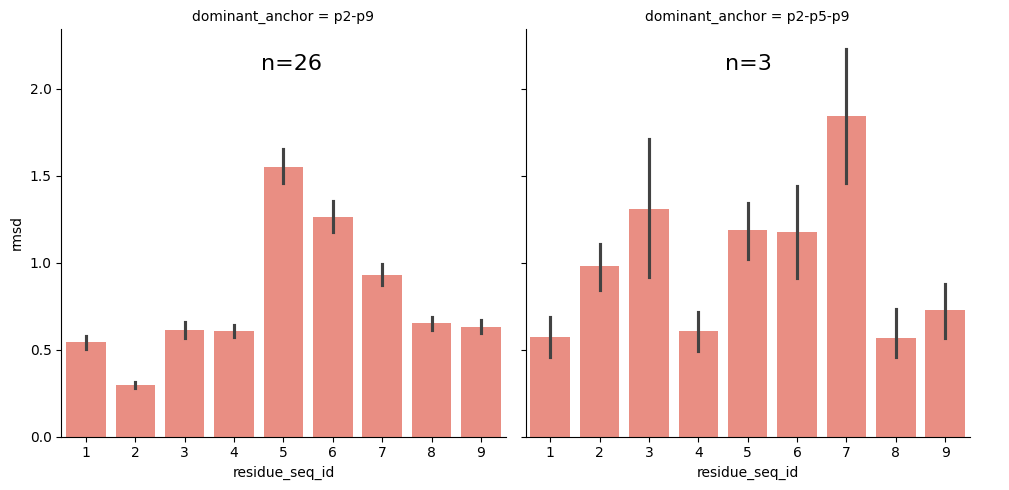

In [15]:
g = sns.catplot(peptide_apo_holo_comparison_with_anchor,
                col='dominant_anchor',
                x='residue_seq_id', y='rmsd',
                sharex=False,
                color='salmon',
                kind='bar')

def annotate(data, **kws):
    groups = data.groupby(['mhc_slug', 'peptide_sequence'])
    ax = plt.gca()
    ax.text(0.45, 0.9, f'n={len(groups)}', fontsize=16, transform=ax.transAxes)

g.map_dataframe(annotate)

hla_a_02_01
p2-p9


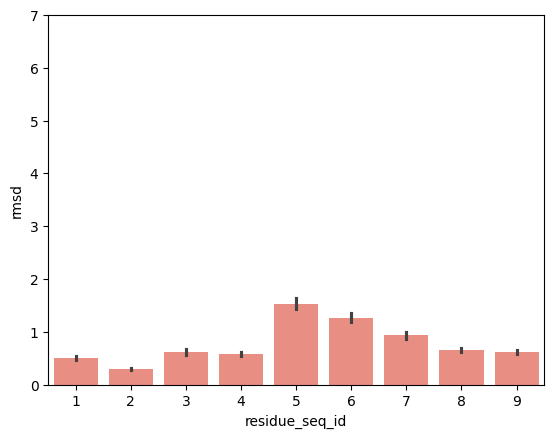

hla_a_24_02
p2-p9


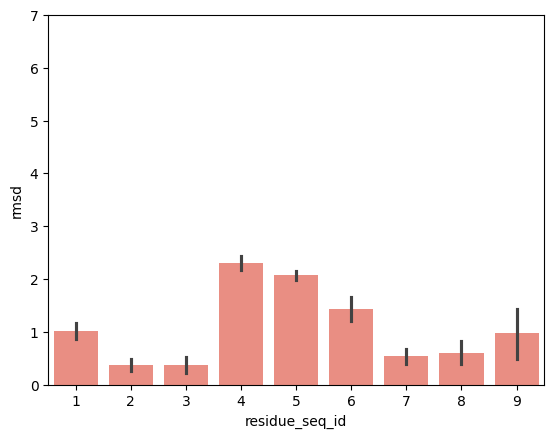

hla_b_07_02
p2-p9


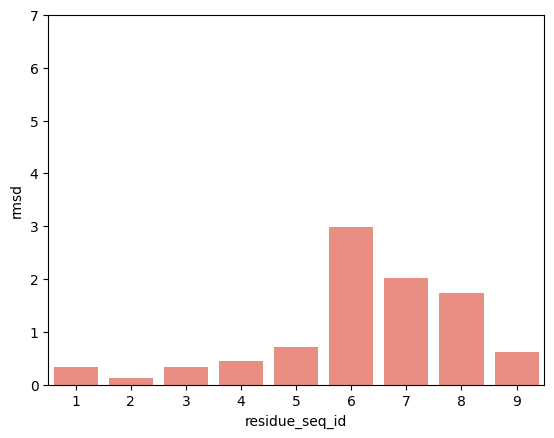

hla_b_08_01
p2-p5-p9


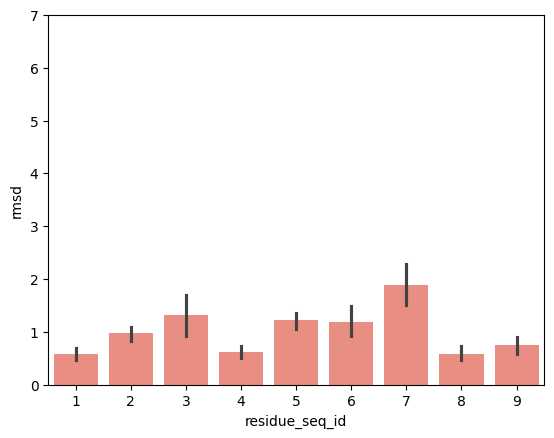

hla_b_35_01
p2-p9


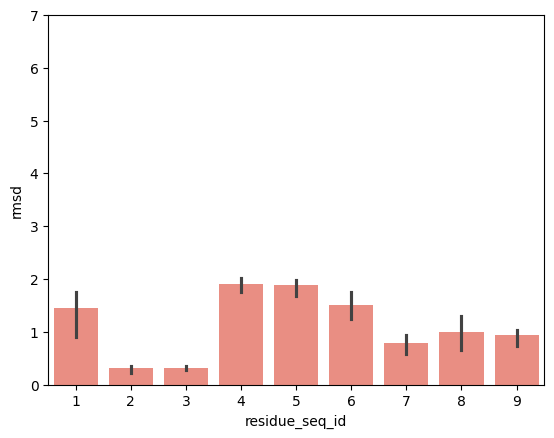

hla_b_37_01
p2-p5-p9


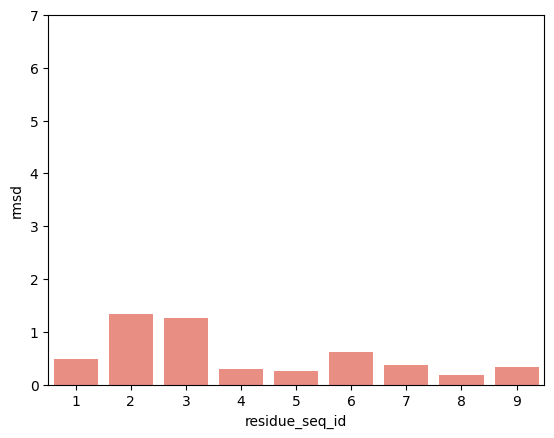

hla_b_42_01
p2-p9


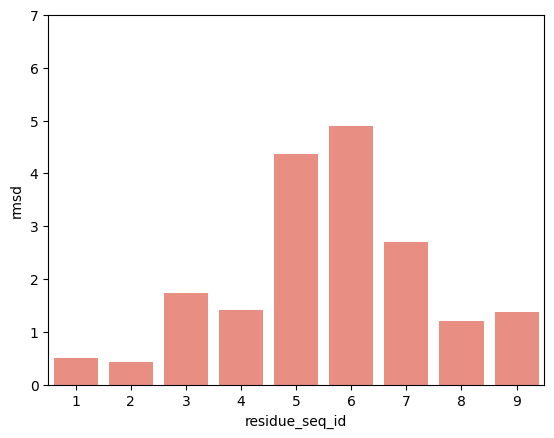

hla_b_44_05
p2-p9


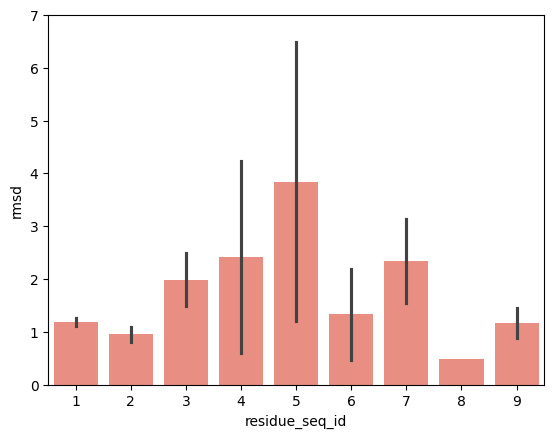

hla_b_53_01
p2-p9


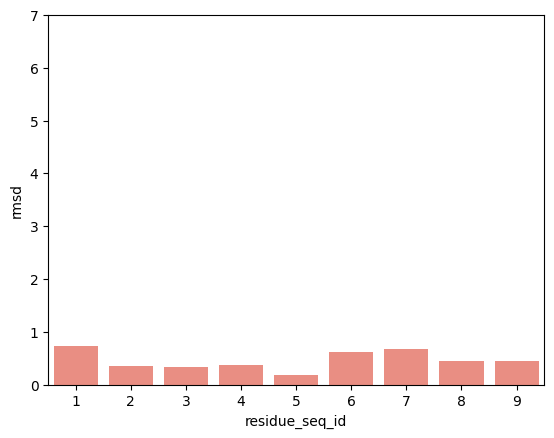

hla_b_81_01
p2-p9


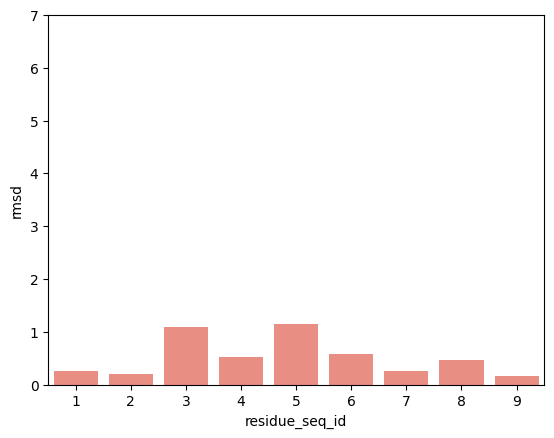

hla_e_01_03
p2-p9


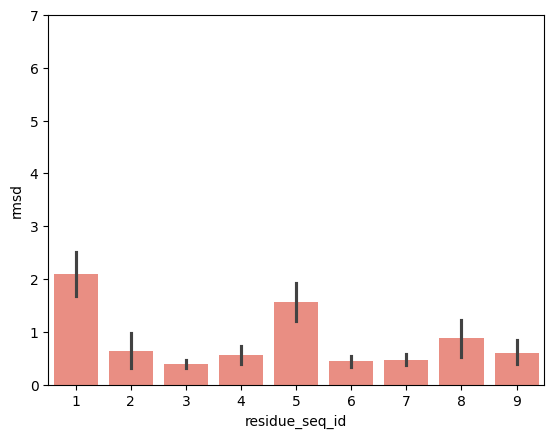

In [16]:
max_rmsd = peptide_apo_holo_comparison_with_anchor['rmsd'].max()

for mhc_slug, group in peptide_apo_holo_comparison_with_anchor.groupby('mhc_slug'):
    print(mhc_slug)
    print(group['dominant_anchor'].unique()[0])
    plot = sns.barplot(group, x='residue_seq_id', y='rmsd', color='salmon')
    plot.set_ylim((0, np.ceil(max_rmsd)))
    plt.show()

<AxesSubplot: xlabel='residue_seq_id', ylabel='rmsd'>

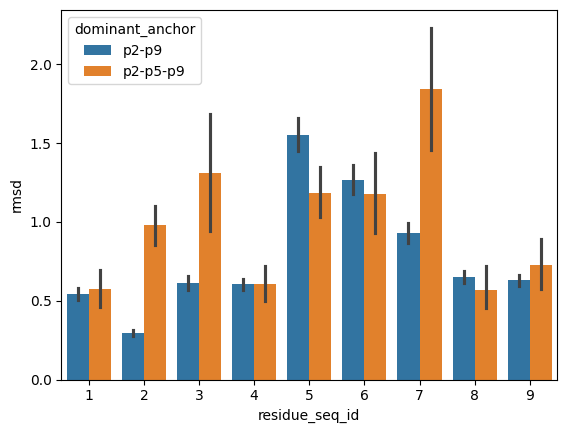

In [17]:
sns.barplot(peptide_apo_holo_comparison_with_anchor,
            hue='dominant_anchor',
            x='residue_seq_id', y='rmsd')

In [ ]:
representative_alleles = (peptide_apo_holo_comparison_with_anchor.groupby('dominant_anchor')[['dominant_anchor', 'mhc_slug']]
                                                                 .sample(1, random_state=1)
                                                                 .reset_index(drop=True))
representative_alleles

dominant_anchor     mhc_slug
0        p2-p5-p9  hla_b_08_01
1           p2-p9  hla_e_01_03

<AxesSubplot: xlabel='residue_seq_id', ylabel='rmsd'>

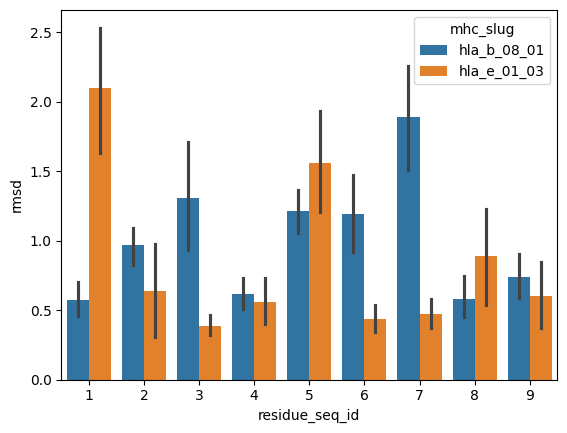

In [19]:
sns.barplot(peptide_apo_holo_comparison_with_anchor.query("mhc_slug.isin(@representative_alleles['mhc_slug'])"),
            hue='mhc_slug',
            x='residue_seq_id', y='rmsd')

## Conclusion

From the visualisations it is clear that the profile of peptide conformational changes depends on the mhc allele and how the peptides are anchored by the allele.